# DT

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

# iris data
iris_dataset = load_iris()

In [10]:
random_seed=1237

In [11]:
# data split(random_state는 셔플을 위한 랜덤 시드)
X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = random_seed)
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 2020)

# modeling
clf.fit(X_train,y_train)

print('train set score {:3f}'.format(clf.score(X_train,y_train)))
print('test set score {:3f}'.format(clf.score(X_test,y_test)))

train set score 0.983333
test set score 0.933333


## hyperparameter tuning

- object, max_depth를 바꾸어가면서 실행해보세요
- min_sample_split, max_feature, class_weight 등의 하이퍼파라미터가 더 있습니다 
- sklearn의 DTC는 pruning은 지원하지 않고, post-pruningj만 지원합니다
- max_depth, max_leaf_nodes 또는 min_samples_leaf로 post-pruning을 조절하는데 보통 이 중 하나로 조절합니다


In [12]:
# object, max_depth를 바꾸어가면서 실행해보세요
def tuning_depth(max_depth):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = random_seed)
    clf = tree.DecisionTreeClassifier(max_depth = max_depth, random_state = random_seed)
    # modeling
    clf.fit(X_train,y_train)
    print('train set score {:3f}'.format(clf.score(X_train,y_train)))
    print('test set score {:3f}'.format(clf.score(X_test,y_test)))


In [15]:
for i in range(1,10):
    print('max depth:',i)
    tuning_depth(i)

max depth: 1
train set score 0.685714
test set score 0.622222
max depth: 2
train set score 0.971429
test set score 0.933333
max depth: 3
train set score 0.980952
test set score 0.911111
max depth: 4
train set score 0.990476
test set score 0.911111
max depth: 5
train set score 0.990476
test set score 0.911111
max depth: 6
train set score 1.000000
test set score 0.911111
max depth: 7
train set score 1.000000
test set score 0.911111
max depth: 8
train set score 1.000000
test set score 0.911111
max depth: 9
train set score 1.000000
test set score 0.911111


- max depth가 6이상 부터 overfitting이 발생(train>test set acc)
- max depth가 2일때의 test set이 가장 높다
- 그러나 깊이가 너무 작아 원하는 분류를 제대로 수행하지 못할 수 있다
- max depth 3~4가 적절한 hyper parameter 값으로 보인다

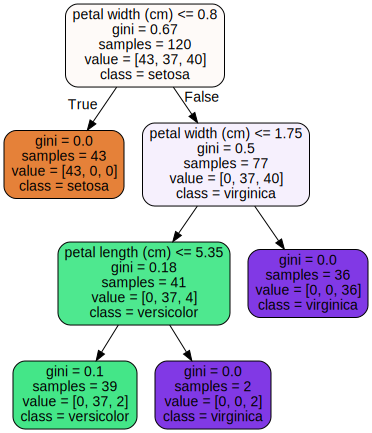

In [16]:
# conda install graphviz, python-graphviz 하고 실행하세요
from sklearn.tree import export_graphviz
import graphviz
import os

os.environ['PATH']+=os.pathsep+'C:/Anaconda3/Library/bin/graphviz/'


# model save
# filled는 색깔, precision은 소수점 자리수 등
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
export_graphviz(clf, out_file = 'iris.dot',
               feature_names = iris_dataset.feature_names,
               class_names = iris_dataset.target_names,
               rounded=True, proportion = False,
               filled=True, precision = 2)

# open
with open('iris.dot') as f:
    dot_graph = f.read()

dot_graph

graphviz.Source(dot_graph)

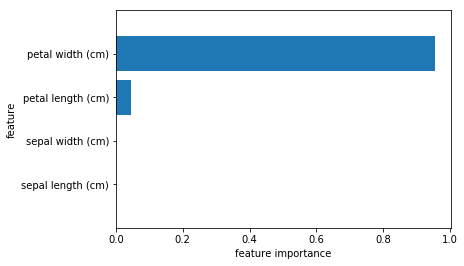

In [18]:
# 어떤 featrue가 주로 사용되었는지 확인해봅시다, 위의 그림 속 맨 위줄 부등호만 봐도 알 수 있긴 하지만.
# 아래의 결과를 보고 'width가 높으면 어떤 클래스이겠구나' 혹은 그 반대를 단정지을 수 없음.

from matplotlib import pyplot as plt
import numpy as np

def plot_feature_importances_iris_dataset(model):
    n_features = iris_dataset.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris_dataset.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_iris_dataset(clf)

- petal width가 주요 feature임을 알 수 있다

# KNN - 원리 예시

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg 
# matplotlib nbagg는 매직명령어
 
A_x_list = [0,2,4,1,1,4]
A_y_list = [4,1,5,5,2,6]
A_x = np.array(A_x_list)
A_y = np.array(A_y_list)
 
B_x_list = [7,7,5,7,10,9]
B_y_list = [4,0,2,2,3,3]
B_x = np.array(B_x_list)
B_y = np.array(B_y_list)
 
finding_point = [5,4]

print(A_x_list)
print(A_x)

[0, 2, 4, 1, 1, 4]
[0 2 4 1 1 4]


## 뜯어보기

In [21]:
def count_min_value(L,c):
    temp = L.copy()
    temp.sort()
    item = temp[c-1]
    return L.index(item),item

In [53]:
#함수 안의 _distance, _min_count 변수를 전역변수로 만들어서 확인
count_min_value(A_distance,A_min_count) 
#min count는 1부터 시작
#return 값은 
#3(min_count)번째로 target과의 거리가 4.123인 A 집합의 점(가까운)

(3, 4.123105625617661)

In [51]:
def finding_AorB(k,x,y):
    
    #뜯어보기 위해 전역변수로 만든다!!
    global A_distance, B_distance 
    global A_min_count,B_min_count
    
    # numA, numB는 합이 k이고, target에서 가까운 점들 중 A , B의 점이 각각 몇 개인지 나타낼 것
    numA = 0
    numB = 0
    
################################ 거리 계산 ###############################    
    # x, y 좌표를 합쳐서 A_xy, B_xy에 넣어줌
    A_xy = []
    B_xy = []
    
    # x,y 좌표가 따로 있는 것을 하나의 리스트로 통합
    for i in range(len(A_x_list)):
        A_xy.append([A_x_list[i],A_y_list[i]])
    for i in range(len(B_x_list)):
        B_xy.append([B_x_list[i],B_y_list[i]])
    
    A_distance = []
    B_distance = []
    
    # x,y 좌표에 대해 입력값과의 거리 산출
    for each in A_xy:
        dis = ((each[0] - x)**2 + (each[1] - y)**2)**(1/2)
        A_distance.append(dis)
    for each in B_xy:
        dis = ((each[0] - x)**2 + (each[1] - y)**2)**(1/2)
        B_distance.append(dis)
        
    A_result = []
    B_result = []

###################### 가장 근처에 있는 요소 뽑기 ##########################

    # 첫번째로 가까운 값부터 시작
    A_min_count = 1
    B_min_count = 1
    
    # numA, numB는 합이 k이고, target에서 가까운 점들 중 A , B의 점이 각각 몇 개인지 나타냄
    while(numA + numB < k):
        min_A = 99999
        min_B = 99999

        # target과 min_count번째로 가까운 A 집합의 점, 가장 가까운 B 집합의 점을 각각 구함
        _, min_A = count_min_value(A_distance,A_min_count)
        _, min_B = count_min_value(B_distance,B_min_count)

        
        # A,B 집합에서 각각 구한 점을 비교해서 거리가 짧은 점의 집합에 num, min_count 모두 1씩 키워줌
        if min_A < min_B:
            numA += 1
            A_min_count += 1
            A_result.append(A_xy[A_distance.index(min_A)])
            A_distance[A_distance.index(min_A)] = -1
            
        elif min_A > min_B:
            numB += 1
            B_min_count += 1
            B_result.append(B_xy[B_distance.index(min_B)])
            B_distance[B_distance.index(min_B)] = -1
        
        # 같은 거리에 있는 점이 있는 경우 A, B 모두 증가시켜줌
        elif min_A == min_B:
            numA += 1
            numB += 1
            A_min_count += 1
            B_min_count += 1
            A_result.append(A_xy[A_distance.index(min_A)])
            A_distance[A_distance.index(min_A)] = -1
            B_result.append(B_xy[B_distance.index(min_B)])
            B_distance[B_distance.index(min_B)] = -1
            
    if numA > numB:
        print("RESULT: The point is A")
    elif numA < numB:
        print("RESULT, The point is B")
    elif numA == numB:
        print("I DON'T KNOW")
    print("near A point is",A_result,"\nnear B point is",B_result,"\n")

In [56]:
# k 값을 바꿔가면서 실행해보세요
k = 2
finding_AorB(k,finding_point[0],finding_point[1])

I DON'T KNOW
near A point is [[4, 5]] 
near B point is [[7, 4]] 



In [55]:
# k 값을 바꿔가면서 실행해보세요
k = 6
finding_AorB(k,finding_point[0],finding_point[1])

RESULT, The point is B
near A point is [[4, 5], [4, 6], [1, 5]] 
near B point is [[7, 4], [5, 2], [7, 2], [9, 3]] 



# KNN - breast cancer로 실습

In [57]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [60]:
bcdata = load_breast_cancer()
X = bcdata.data
y = bcdata.target

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_seed, test_size = 0.3)
X_train.shape[0], X_test.shape[0]


(398, 171)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors는 k 수 (class가 짝수일 때 보통 홀수), n_jobs는 사용가능한 CPU(core)의 개수
model = KNeighborsClassifier(n_neighbors = 4, n_jobs = -1, p=2, leaf_size =30)

In [63]:
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9371859296482412
0.9532163742690059


- session 07에서 svm으로 돌렸을 때는 64% 나왔었는데... 많이 향상된 모습을 보인다